In [13]:
import numpy as np
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.cluster import AgglomerativeClustering

class MSTClustering:
    def __init__(self, cutoff_scale=1.0, approximate=False):
        self.cutoff_scale = cutoff_scale
        self.approximate = approximate

    def fit_predict(self, X):
        self.X_fit_ = X
        distance_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)
        mst = minimum_spanning_tree(distance_matrix).toarray()
        self.labels_ = AgglomerativeClustering(distance_threshold=self.cutoff_scale, 
                                                n_clusters=None).fit_predict(X)
        return self.labels_

    def get_graph_segments(self, full_graph=True):
        distance_matrix = np.linalg.norm(self.X_fit_[:, np.newaxis] - self.X_fit_, axis=2)
        mst = minimum_spanning_tree(distance_matrix).toarray()
        edges = np.where(mst > 0)

        segments = []
        for i in range(len(edges[0])):
            start = self.X_fit_[edges[0][i]]
            end = self.X_fit_[edges[1][i]]
            segments.append(np.array([start, end]))

        segments = np.array(segments)
        return segments[:, :, 0].T, segments[:, :, 1].T  # Return X and Y coordinates


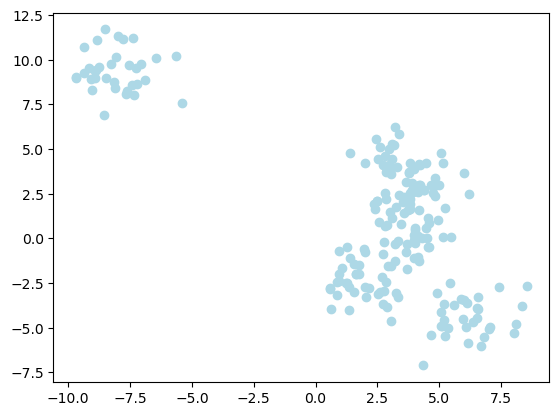

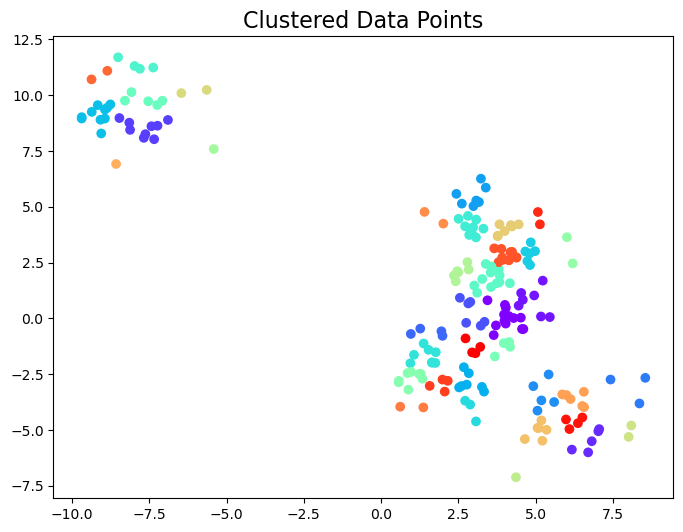

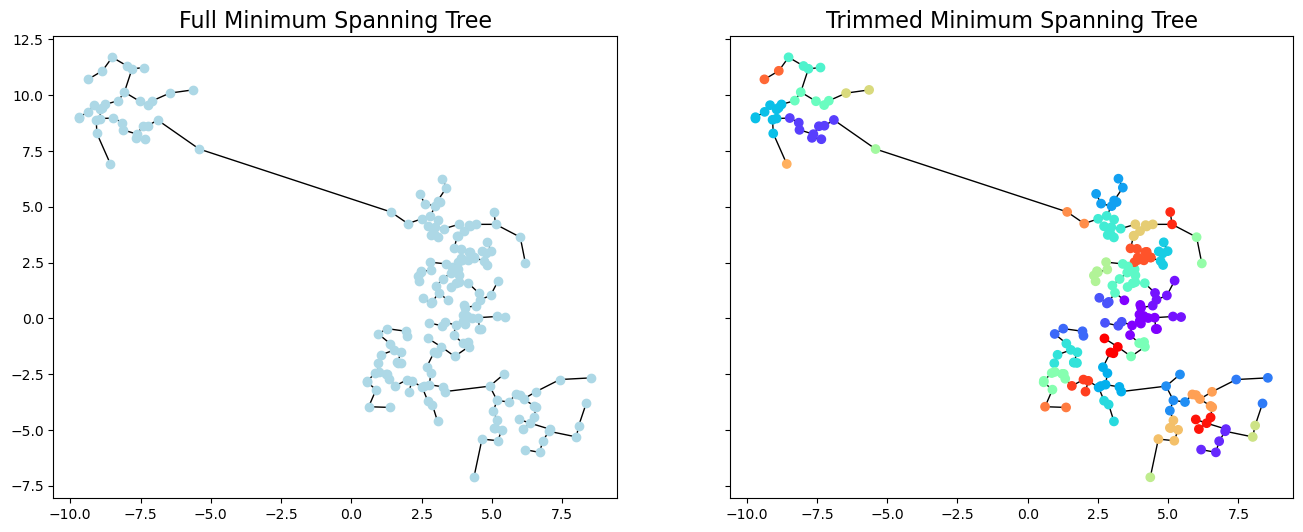

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
#from mst_clustering import MSTClustering  # Ensure this matches the file name

warnings.filterwarnings("ignore", message="elementwise")

def plot_mst(model, cmap='rainbow'):
    """Plot the Minimum Spanning Tree (MST) clustering results."""
    
    X = model.X_fit_  # Extract the data points from the fitted model
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)  # Plot MST edges
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)  # Plot data points with colors
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16)

# Generate synthetic data
X, y = make_blobs(200, centers=6)
plt.scatter(X[:, 0], X[:, 1], c='lightblue')

# Initialize and fit the MSTClustering model
model = MSTClustering(cutoff_scale=2, approximate=False)
labels = model.fit_predict(X)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('Clustered Data Points', size=16)
plt.show()

# Plot the MST with clusters
plot_mst(model)
plt.show()
